In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.stattools import omni_normtest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import numpy as np

# 회귀분석
from sklearn.linear_model import LinearRegression

# 의사결정나무
from sklearn.tree import DecisionTreeRegressor

# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

# 그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
import os


# 평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False
os.environ['PATH']+=os.pathsep+"~/anaconda3/lib/python3.7/site-packages"

### Data Open

In [3]:
df=pd.read_csv("data/BigData/체질검사.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
FAT        252 non-null float64
AGE        252 non-null int64
WEIGHT     252 non-null float64
HEIGHT     252 non-null float64
NECK       252 non-null float64
CHEST      252 non-null float64
ABDOMEN    252 non-null float64
HIP        252 non-null float64
THIGH      252 non-null float64
KNEE       252 non-null float64
ANKLE      252 non-null float64
BICEPS     252 non-null float64
FOREARM    252 non-null float64
WRIST      252 non-null float64
dtypes: float64(13), int64(1)
memory usage: 27.6 KB


In [4]:
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [5]:
df_y=df['FAT']
df_x = df.drop('FAT',axis=1)


In [6]:
# x: 설명변수 데이터, y: 목표변수 데이터, test_size: test데이터 비율, random_state:random_seed
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y, test_size=0.3,
                                                               random_state=1234)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(176, 13)
train data Y size :(176,)
test data X size :(76, 13)
test data Y size :(76,)


# 회귀모델

In [17]:
# 회귀모델 생성
rfe_reg_model = smf.ols(formula = "FAT~NECK + ABDOMEN + HIP + FOREARM + WRIST", data=df)

#fitting
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           4.38e-68
Time:                        13:59:56   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

# 의사결정나무

In [8]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split=20, max_depth=4,
                                  random_state=1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

# 랜덤포레스트

In [9]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf=5, min_samples_split=14, max_depth=4)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set :{:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set :0.829
Score on test set : 0.628


# 그래디언트 부스팅

In [10]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=11, 
                                     min_samples_split=22, max_depth=4, learning_rate=0.1)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set :{:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set :0.900
Score on test set : 0.629


In [27]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [28]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [52]:
models=["회귀분석","의사결정나무","랜덤포레스트","그래디언트 부스팅"]
mse,rmse,mae,mape=[],[],[],[]

In [53]:
lr_y_pred=rfe_reg_result.predict(df_test_x)


mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [54]:
dt_y_pred=tree_final.predict(df_test_x)


mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [55]:
rf_y_pred=rf_final.predict(df_test_x)


mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [56]:
gb_y_pred=gb_final.predict(df_test_x)


mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

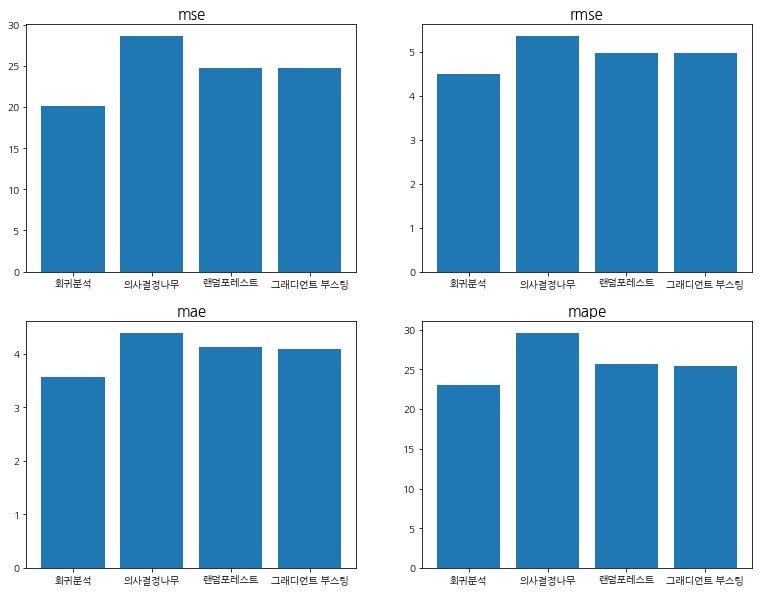

In [57]:
fig,ax=plt.subplots(2,2,figsize=(13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)